# Importing all necessary libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

%matplotlib inline

## Load Data

In [2]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,4b65dfadb1742b415136d191973da00d,42,385,3,58,24,0,0,0,Yes,...,0,4,18,0,2,1,87,87,66,Yes
1,3dc4e0a208acbfd793d585d61e4da5cd,85,180,1,77,0,0,0,0,No,...,0,0,0,0,0,0,17,17,3,Yes
2,23e106637070d37b8d8e1b681fdb54df,37,279,6,50,12,0,0,0,Yes,...,0,16,0,0,1,0,48,49,39,No
3,928fddf2335bb4d1211357b0c5abfad8,295,311,12,349,12,0,0,0,Yes,...,0,12,1,1,1,1,172,174,414,No
4,3d95d975bb58268c5664bd05166d14db,102,180,2,24,0,0,0,-1,unclear,...,1,0,1,0,0,0,10,10,4,Yes


## Get a brief summary for our PDF dataset.

In [3]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   MD5                      210339 non-null  object
 1   pdfsize                  210339 non-null  int64 
 2   metadata size            210339 non-null  int64 
 3   pages                    210339 non-null  int64 
 4   xref length              210339 non-null  int64 
 5   title characters         210339 non-null  int64 
 6   isEncrypted              210339 non-null  int64 
 7   embedded files           210339 non-null  int64 
 8   images                   210339 non-null  int64 
 9   contains text            210339 non-null  object
 10  header                   210339 non-null  object
 11  obj                      210339 non-null  int64 
 12  endobj                   210339 non-null  int64 
 13  stream                   210339 non-null  int64 
 14  endstream           

In [4]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(210339, 62)

## Check data types for our dataset

In [5]:

df_pdf.dtypes.value_counts()


int64     58
object     4
Name: count, dtype: int64

In [6]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
count,210339.000000,210339.000000,210339.000000,2.103390e+05,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,...,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000
mean,371.220164,567.017120,17.145218,1.233154e+03,99.544640,0.027318,0.003884,-0.026305,274.749642,274.813544,...,30.361112,0.827265,9.998317,9.814799,0.796861,1.259348,1.016973,336.815403,338.951359,585.950304
std,903.154355,1962.466237,48.838829,1.024080e+04,1512.407406,0.163125,0.101145,0.160042,1217.304837,1218.033083,...,266.854390,23.264933,58.621815,108.552334,1.864145,2.273504,4.852558,1302.581022,1311.675151,1626.091091
min,0.000000,4.000000,0.000000,2.000000e+00,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,24.000000,257.000000,1.000000,3.600000e+01,0.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,33.000000,22.000000
50%,67.000000,312.000000,3.000000,6.600000e+01,15.000000,0.000000,0.000000,0.000000,55.000000,55.000000,...,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,78.000000,78.000000,85.000000
75%,270.000000,369.000000,15.000000,2.030000e+02,36.000000,0.000000,0.000000,0.000000,141.000000,141.000000,...,5.000000,0.000000,12.000000,2.000000,1.000000,1.000000,1.000000,199.000000,200.000000,401.000000
max,50820.000000,80840.000000,2316.000000,1.179814e+06,80647.000000,1.000000,18.000000,0.000000,111656.000000,111656.000000,...,22824.000000,2749.000000,24347.000000,13204.000000,229.000000,212.000000,410.000000,124977.000000,124943.000000,87470.000000


## Check total Missing values.

In [7]:

sum(df_pdf.isnull().sum())


0

In [8]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [9]:
# Display Missing values for specific column
df_pdf[df_pdf.Malicious.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


In [10]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


## Visualize Bar chart of missing values

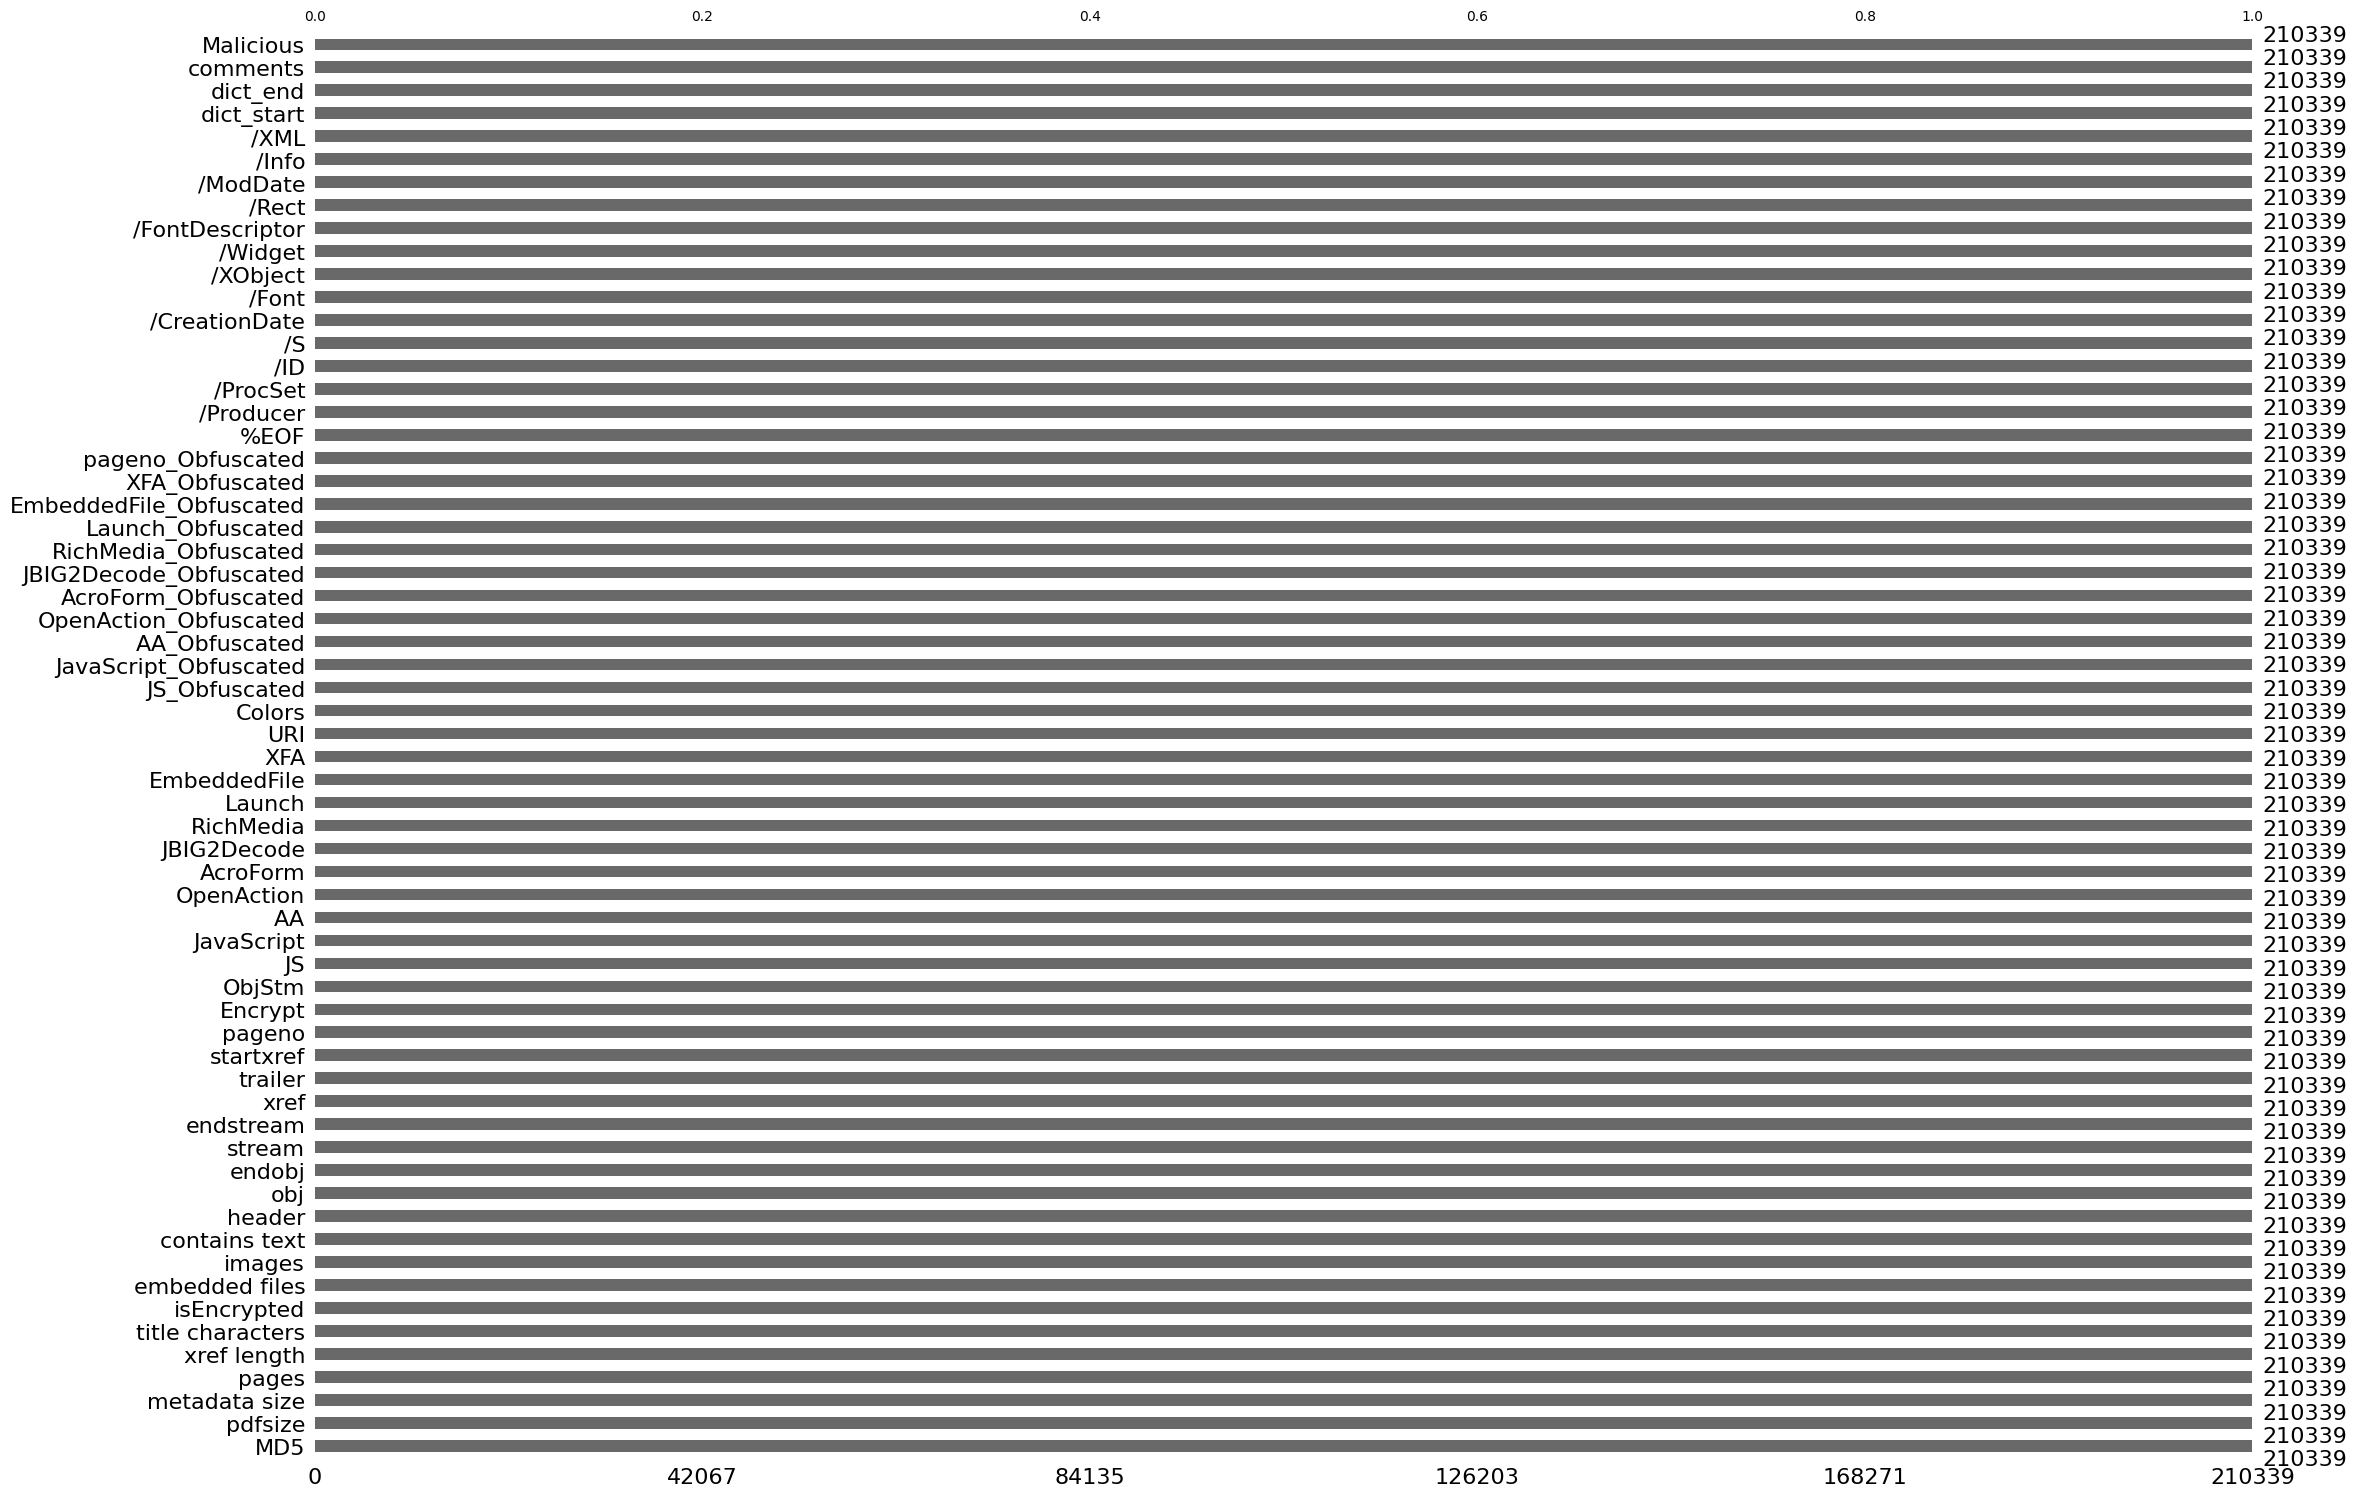

In [11]:

msno.bar(df_pdf);

In [12]:
# Check missing after applied imputation
df_pdf.isnull().sum()


MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [13]:
sum(df_pdf.isnull().sum())

0

In [14]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)

# Check values of each categorical column that have missing value/s


In [15]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 61 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   pdfsize                  210339 non-null  int64 
 1   metadata size            210339 non-null  int64 
 2   pages                    210339 non-null  int64 
 3   xref length              210339 non-null  int64 
 4   title characters         210339 non-null  int64 
 5   isEncrypted              210339 non-null  int64 
 6   embedded files           210339 non-null  int64 
 7   images                   210339 non-null  int64 
 8   contains text            210339 non-null  object
 9   header                   210339 non-null  object
 10  obj                      210339 non-null  int64 
 11  endobj                   210339 non-null  int64 
 12  stream                   210339 non-null  int64 
 13  endstream                210339 non-null  int64 
 14  xref                

In [16]:
# Check duplicate points in our dataset
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [17]:
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [18]:
# Drop duplicate rows
df_pdf = df_pdf.drop_duplicates()


In [19]:
df_pdf.Malicious.value_counts()


Malicious
No     56149
Yes    36862
Name: count, dtype: int64

In [20]:
data = df_pdf.copy()
data.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## Dropping Obfuscated Columns

In [21]:
data = data.drop(columns=[col for col in data.columns if col.endswith('_Obfuscated')])
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## result and text mapping

In [22]:
data["contains text"].unique()

array(['Yes', 'No', 'unclear'], dtype=object)

In [23]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 49] = data.iloc[:, 49].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,1


## Converting header values (text to float)

In [24]:
data["header"].unique()

array(['%PDF-1.4', '%PDF-1.6', '%PDF-1.2', '%PDF-1.3', '%PDF-1.5',
       '%PDF-1.7', 'Malformed', '%PDF-1.0', '%PDF-1.1'], dtype=object)

In [25]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

In [26]:
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


## Converting objects to numeric values

In [27]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


In [28]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93011 entries, 0 to 210332
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           93011 non-null  int64
 1   metadata size     93011 non-null  int64
 2   pages             93011 non-null  int64
 3   xref length       93011 non-null  int64
 4   title characters  93011 non-null  int64
 5   isEncrypted       93011 non-null  int64
 6   embedded files    93011 non-null  int64
 7   images            93011 non-null  int64
 8   contains text     93011 non-null  int64
 9   header            93011 non-null  int64
 10  obj               93011 non-null  int64
 11  endobj            93011 non-null  int64
 12  stream            93011 non-null  int64
 13  endstream         93011 non-null  int64
 14  xref              93011 non-null  int64
 15  trailer           93011 non-null  int64
 16  startxref         93011 non-null  int64
 17  pageno            93011 non-null  i

## Train-Test split

In [29]:
X = data.drop(columns=[ data.columns[49]])  # Adjusted indices
y = data.iloc[:, 49]

In [30]:
X_malicious = X[y == 1]
X_non_malicious = X[y == 0]
y_malicious = y[y == 1] 
y_non_malicious = y[y == 0]

# Take 30k samples from each class for training
X_train = pd.concat([X_malicious[:30000], X_non_malicious[:30000]])
y_train = pd.concat([y_malicious[:30000], y_non_malicious[:30000]])

# Take remaining malicious samples and 10k non-malicious for testing 
X_test = pd.concat([X_malicious[30000:], X_non_malicious[30000:40000]])
y_test = pd.concat([y_malicious[30000:], y_non_malicious[30000:40000]])

In [31]:
y_test.value_counts()

Malicious
0    10000
1     6862
Name: count, dtype: int64

In [32]:
y_train.value_counts()

Malicious
1    30000
0    30000
Name: count, dtype: int64

# **XGBoost**

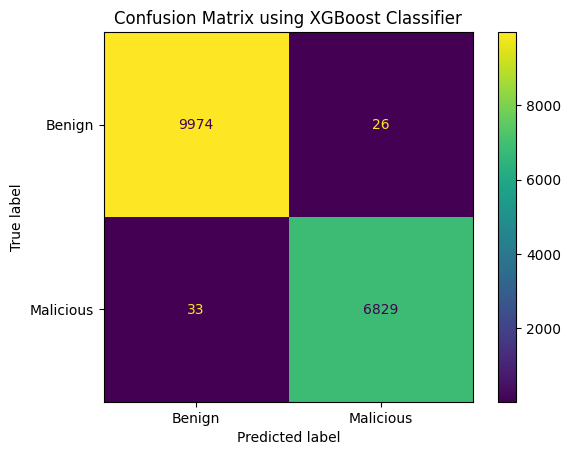

False Positive Rate: 0.0026
True Positive Rate: 0.9951909064412707
Accuracy Score: 0.9965010081840826


In [33]:
# Import the XGBoost classifier
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using XGBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}')

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
import shap

def analyze_feature_importance(X, y, n_features):
    """
    Analyze feature importance using multiple methods and return top features.
    
    Parameters:
    X : pandas DataFrame of features
    y : target variable
    n_features : number of top features to return
    
    Returns:
    dict : Dictionary containing results from different methods
    """
    results = {}
    
    # 1. Random Forest Feature Importance
    xgb_importance = pd.DataFrame({
        'feature': data.columns[:-1],
        'importance': xgb.feature_importances_
    }).sort_values('importance', ascending=False)
    results['random_forest'] = xgb_importance.head(n_features)
       
    return results

# Example usage:

# Assuming you have your data in X (features) and y (target):
results = analyze_feature_importance(X_test, y_test, n_features=25)


# Print results from each method
for method, df in results.items():

    print(f"\n{method.upper()} Top Features:")
    print(df)



c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



RANDOM_FOREST Top Features:
           feature  importance
35             /ID    0.705016
16       startxref    0.061144
38           /Font    0.042053
34        /ProcSet    0.032805
8    contains text    0.025598
20              JS    0.022192
9           header    0.016159
42           /Rect    0.014511
6   embedded files    0.009085
33       /Producer    0.006677
24        AcroForm    0.006344
2            pages    0.006182
14            xref    0.004331
19          ObjStm    0.004176
27          Launch    0.004087
44           /Info    0.002943
43        /ModDate    0.002914
22              AA    0.002779
28    EmbeddedFile    0.002747
17          pageno    0.002423
29             XFA    0.002328
12          stream    0.001934
1    metadata size    0.001755
3      xref length    0.001749
26       RichMedia    0.001678


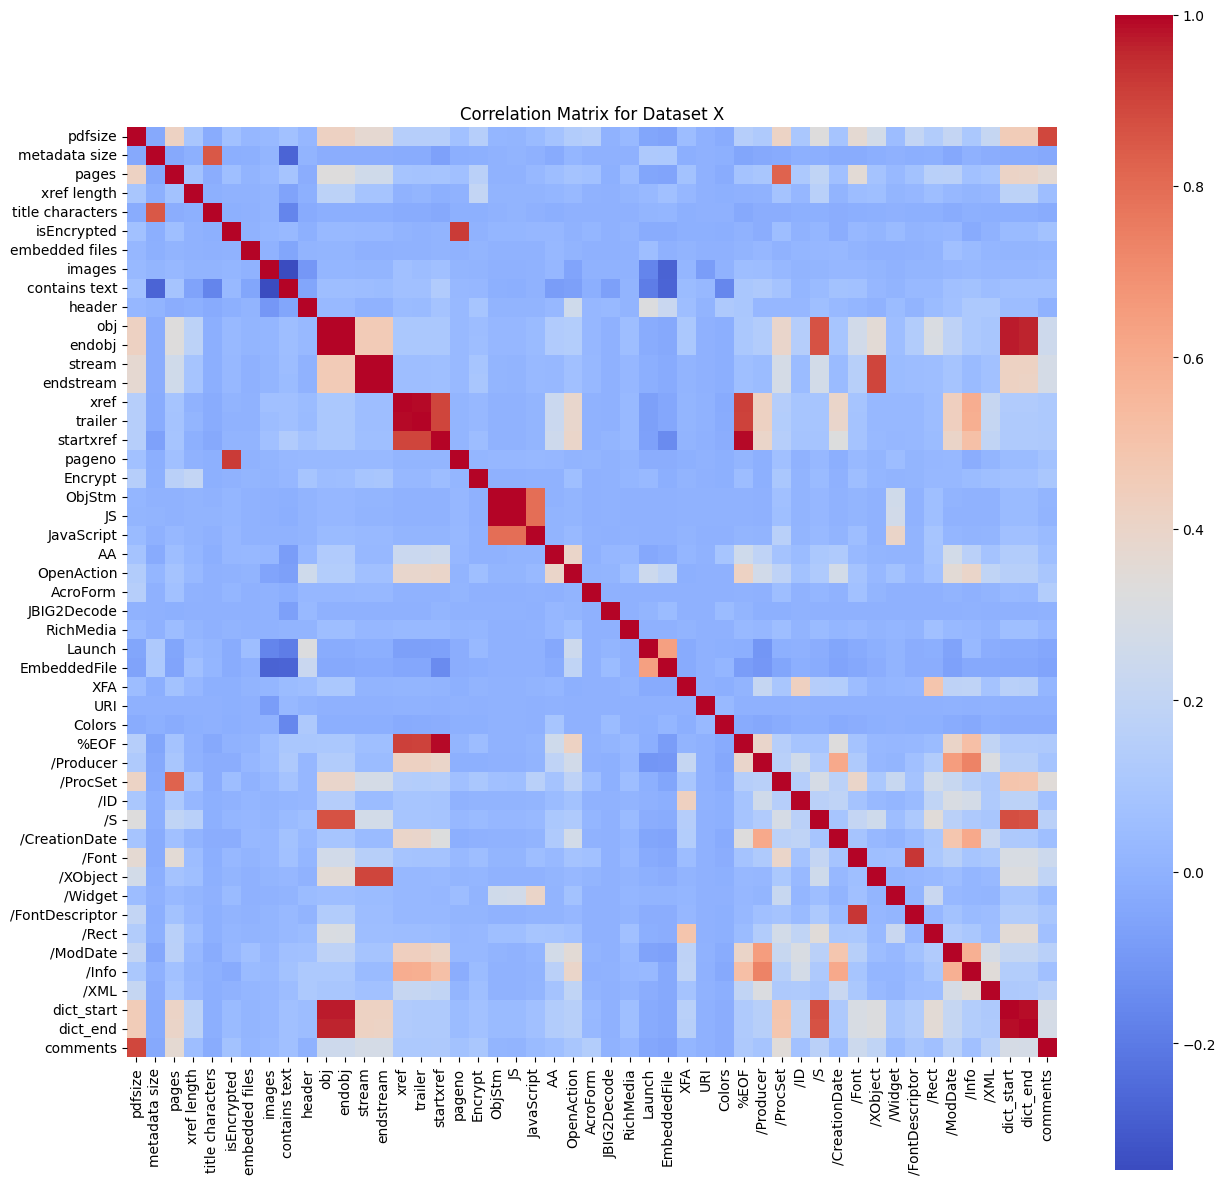

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with 49 features
# Generate a random dataset for demonstration
# X = pd.DataFrame(np.random.rand(100, 49), columns=[f"Feature_{i}" for i in range(1, 50)])

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Display the plot
plt.title("Correlation Matrix for Dataset X")
plt.show()


In [36]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Assuming 'X' is your dataset and 'y' are the labels
# Also, 'model' is a trained Random Forest model on this dataset

# Example: Train a random forest model for demonstration
# model = RandomForestClassifier()
# model.fit(X, y)

# Initialize the SHAP explainer with the model and data
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)

In [37]:
# Compute SHAP values
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)

 99%|===================| 16637/16862 [01:00<00:00]        

In [51]:
shap_values.shape

(16862, 49)

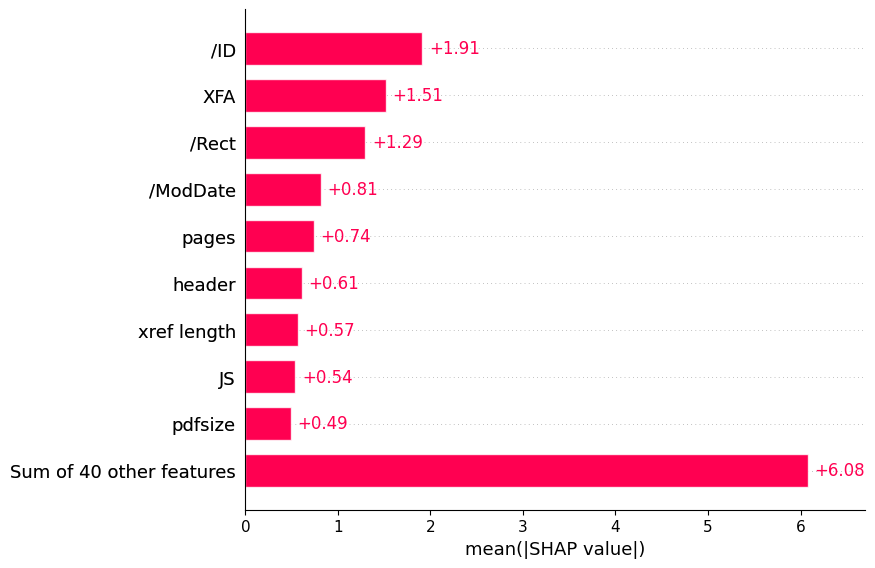

In [42]:
shap.plots.bar(shap_values)

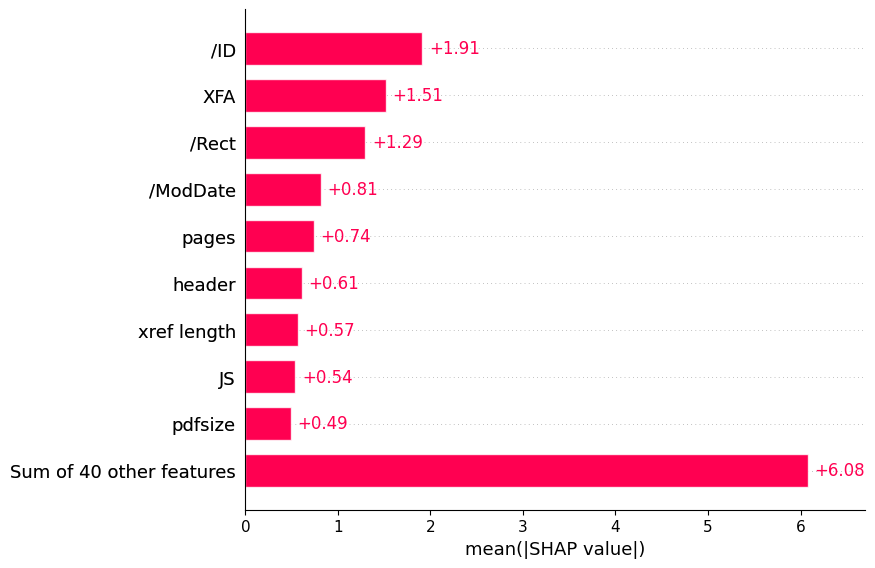

In [43]:
shap.plots.bar(shap_values)

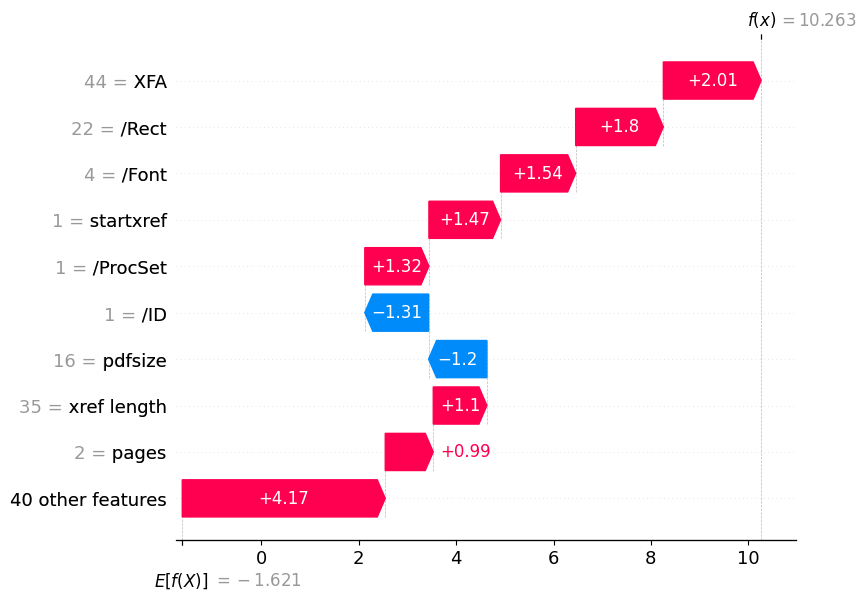

In [44]:
shap.plots.waterfall(shap_values[0])

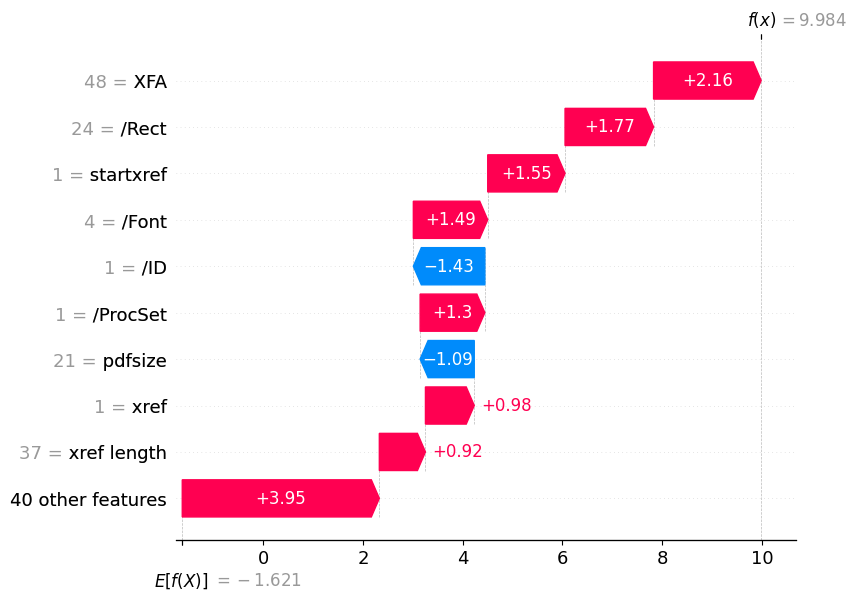

In [45]:
shap.plots.waterfall(shap_values[1])

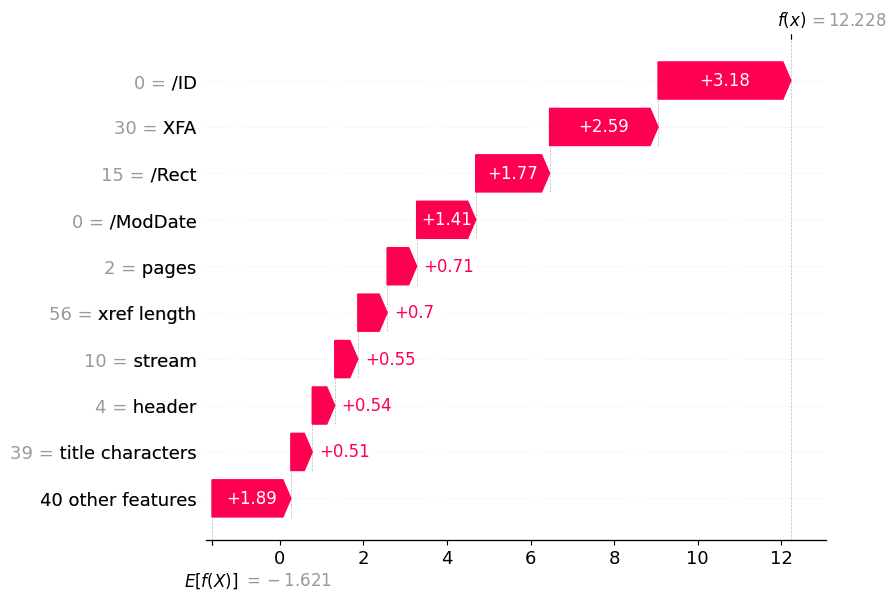

In [46]:
shap.plots.waterfall(shap_values[4])

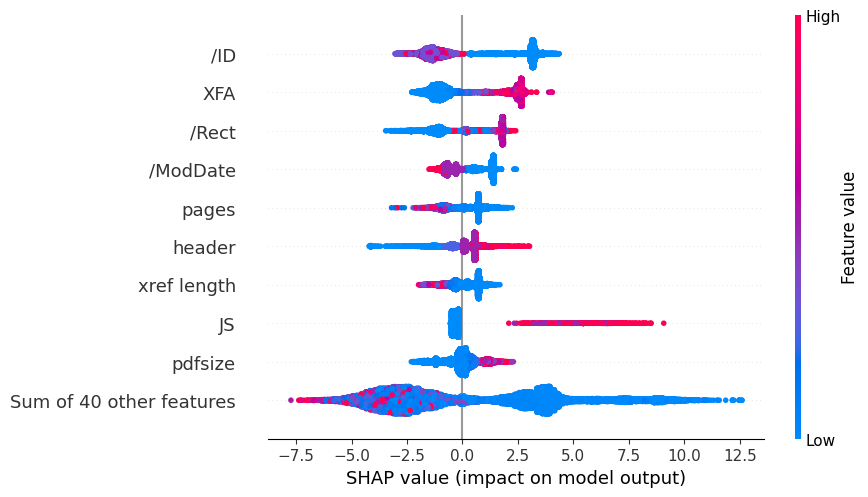

In [47]:
shap.plots.beeswarm(shap_values)

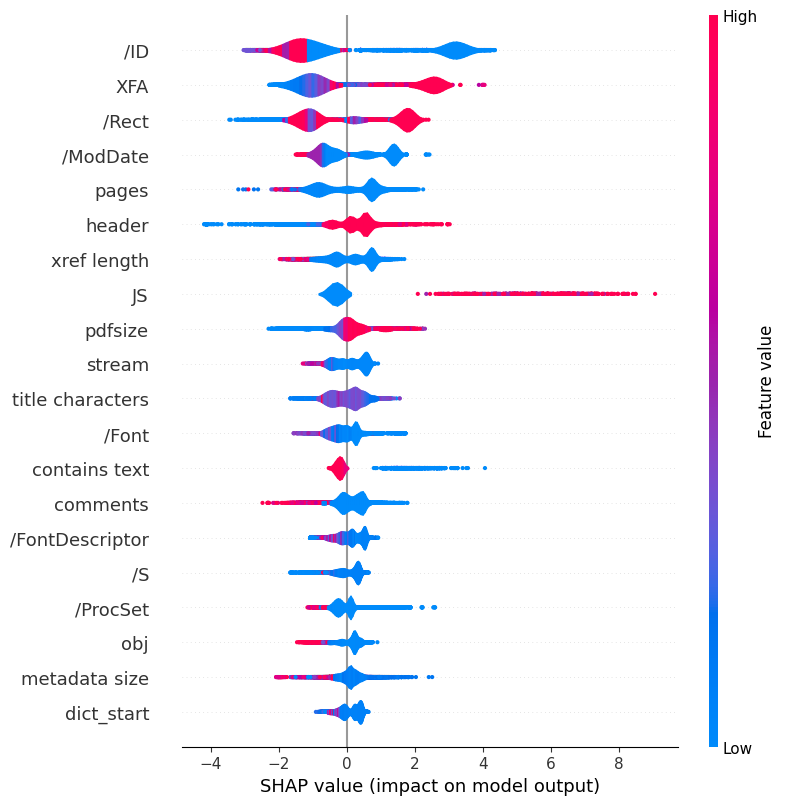

In [50]:
shap.plots.violin(shap_values)

## Optuna

In [53]:
Hdf = pd.read_csv('MalwareBazaar.csv')

# Add 'Malicious' column with 'Yes' values
Hdf['Malicious'] = 'Yes'

In [54]:
Hdf.drop('MD5', axis=1, inplace=True)

In [55]:
# Check duplicate points in our dataset
Hdf.duplicated().sum() # No duplicates

np.int64(31)

In [56]:
Hdf=Hdf.dropna()
Hdf.duplicated().sum() # No duplicates

np.int64(31)

In [57]:
# Drop duplicate rows
Hdf = Hdf.drop_duplicates()


In [58]:
Hdf.Malicious.value_counts()


Malicious
Yes    495
Name: count, dtype: int64

In [59]:
Hdata = Hdf.copy()
Hdata.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,Yes
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,Yes
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,Yes
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,Yes
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,Yes


In [60]:
Hdata = Hdata.drop(columns=[col for col in Hdata.columns if col.endswith('_Obfuscated')])
Hdata.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,Yes
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,Yes
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,Yes
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,Yes
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,Yes


In [61]:
# Assuming df_pdf is your DataFrame
Hdata.iloc[:, 49] = Hdata.iloc[:, 49].map({'Yes': 1, 'No': 0})
Hdata.iloc[:, 8] = Hdata.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
Hdata.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,1,%PDF-1.4,...,0,10,1,1,1,0,59,60,57,1
1,192,314,1,136,8,0,0,0,1,%PDF-1.7,...,0,0,0,0,4,3,53,60,303,1
2,32,290,1,8,0,0,0,0,0,%PDF-1.4,...,0,0,1,1,1,0,11,12,47,1
3,0,275,1,7,19,0,0,0,0,%PDF-1.7,...,0,0,0,1,1,0,7,7,2,1
4,59,212,1,13,0,0,0,0,1,%PDF-1.3,...,0,0,1,0,1,0,17,18,87,1


In [62]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
Hdata.iloc[:,9] = Hdf.iloc[:,9].map(value_mapping)

In [ ]:
# Assuming 'data' is your DataFrame
Hdata = Hdata.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
Hdata.fillna(0, inplace=True)  #

Hdata.head() # Ensure data is loaded correctly

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,62,288,2,59,0,0,0,0,1,4.0,...,0,10,1,1,1,0,59,60,57,1
1,192,314,1,136,8,0,0,0,1,7.0,...,0,0,0,0,4,3,53,60,303,1
2,32,290,1,8,0,0,0,0,0,4.0,...,0,0,1,1,1,0,11,12,47,1
3,0,275,1,7,19,0,0,0,0,7.0,...,0,0,0,1,1,0,7,7,2,1
4,59,212,1,13,0,0,0,0,1,3.0,...,0,0,1,0,1,0,17,18,87,1


In [64]:
X_test = Hdata.drop('Malicious',axis=1)
y_test = Hdata['Malicious']

In [65]:
X = data.drop(columns=[ data.columns[49]])  # Adjusted indices
y = data.iloc[:, 49]

In [66]:
y.value_counts()

Malicious
0    56149
1    36862
Name: count, dtype: int64

In [68]:
X_malicious = X[y == 1]
X_non_malicious = X[y == 0]
y_malicious = y[y == 1]
y_non_malicious = y[y == 0]

# Take 30k samples from each class for training
X_train = pd.concat([X_malicious[:35000], X_non_malicious[:35000]])
y_train = pd.concat([y_malicious[:35000], y_non_malicious[:35000]])

In [84]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score  # Changed to classification metric
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7)
    }
    
    # Create and train model
    model = XGBClassifier(**params)  # Changed to XGBClassifier
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    error = 1.0 - accuracy_score(y_test, y_pred)  # Changed to classification metric
    
    return error

# Create and run study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get best parameters and score
print('Best parameters:', study.best_params)
print('Best score:', 1.0 - study.best_value)  # Convert error back to accuracy
# Train final model with best parameters
best_model = XGBClassifier(**study.best_params)  # Changed to XGBClassifier
best_model.fit(X_train, y_train)


[I 2024-11-07 22:02:10,386] A new study created in memory with name: no-name-2581ac42-2e16-4db6-bc9e-2053073f85cc
[I 2024-11-07 22:02:11,652] Trial 0 finished with value: 0.1777777777777778 and parameters: {'n_estimators': 347, 'max_depth': 9, 'learning_rate': 0.18051623966440297, 'subsample': 0.9068371331474506, 'colsample_bytree': 0.9966840634228838, 'min_child_weight': 2}. Best is trial 0 with value: 0.1777777777777778.
[I 2024-11-07 22:02:13,870] Trial 1 finished with value: 0.15959595959595962 and parameters: {'n_estimators': 603, 'max_depth': 7, 'learning_rate': 0.23976871803188982, 'subsample': 0.901416166152363, 'colsample_bytree': 0.6343828969012424, 'min_child_weight': 5}. Best is trial 1 with value: 0.15959595959595962.
[I 2024-11-07 22:02:15,449] Trial 2 finished with value: 0.1656565656565656 and parameters: {'n_estimators': 784, 'max_depth': 3, 'learning_rate': 0.06354805925012387, 'subsample': 0.9142198554347285, 'colsample_bytree': 0.8628057459594128, 'min_child_weight'

Best parameters: {'n_estimators': 973, 'max_depth': 4, 'learning_rate': 0.29551846768638934, 'subsample': 0.6307508700115003, 'colsample_bytree': 0.9060368374784977, 'min_child_weight': 6}
Best score: 0.8505050505050505


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9060368374784977, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29551846768638934,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=973, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8505050505050505

In [86]:
X_malicious = X[y == 1]
X_non_malicious = X[y == 0]
y_malicious = y[y == 1] 
y_non_malicious = y[y == 0]

# Take 30k samples from each class for training
X_train = pd.concat([X_malicious[:30000], X_non_malicious[:30000]])
y_train = pd.concat([y_malicious[:30000], y_non_malicious[:30000]])

# Take remaining malicious samples and 10k non-malicious for testing 
X_test = pd.concat([X_malicious[30000:], X_non_malicious[30000:40000]])
y_test = pd.concat([y_malicious[30000:], y_non_malicious[30000:40000]])

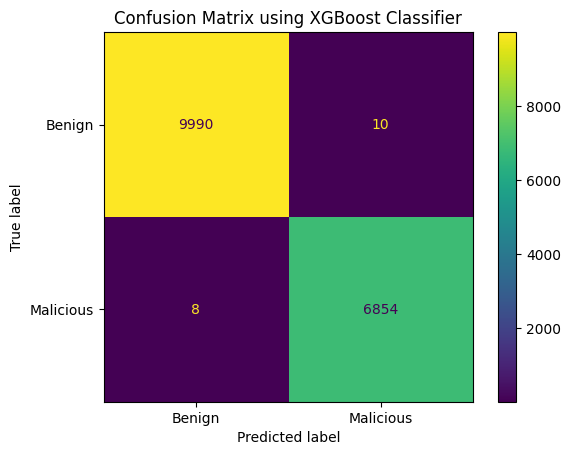

False Positive Rate: 0.001
True Positive Rate: 0.9988341591372778
Accuracy Score: 0.998932510971415


In [90]:
y_pred_xgb = best_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using XGBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}')

In [91]:
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

100%|===================| 16844/16862 [03:57<00:00]        

In [92]:
shap_values.shape

(16862, 49)

In [ ]:
mean_shap_values = pd.DataFrame(shap_values.values, columns=X_test.columns).abs().mean().sort_values(ascending=False)

# Get the top 15 features
top_15_features = mean_shap_values.head(15)
print(top_15_features)

XFA                 2.373532
/ID                 2.139211
xref length         1.015798
endobj              0.861669
/Info               0.840707
/ModDate            0.833893
pdfsize             0.792699
/Rect               0.782789
/FontDescriptor     0.778657
pages               0.732491
/XObject            0.717858
obj                 0.715441
header              0.712542
title characters    0.678666
dict_end            0.644826
dtype: float64


In [94]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_xgb(n_top_features):
  top_features = mean_shap_values.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  best_model.fit(X_train_top15, y_train)
  y_pred = best_model.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [96]:
results = evaluate_xgb(n_top_features=5)
print(results)


{'Accuracy': 0.9781164749140079, 'Precision': np.float64(0.9684028278747655), 'Recall': np.float64(0.978140483823958), 'F1 Score': np.float64(0.9732472993547452)}


In [97]:
results = evaluate_xgb(n_top_features=10)
print(results)


{'Accuracy': 0.9905112086348001, 'Precision': np.float64(0.9870639534883721), 'Recall': np.float64(0.9896531623433401), 'F1 Score': np.float64(0.988356862174356)}


In [98]:
results = evaluate_xgb(n_top_features=15)
print(results)


{'Accuracy': 0.9927647965840352, 'Precision': np.float64(0.9918272037361354), 'Recall': np.float64(0.9903818128825416), 'F1 Score': np.float64(0.9911039813329444)}


In [99]:
results = evaluate_xgb(n_top_features=20)
print(results)


{'Accuracy': 0.9956707389396275, 'Precision': np.float64(0.9956197985107315), 'Recall': np.float64(0.9937336053628679), 'F1 Score': np.float64(0.9946758077456057)}


In [100]:
results = evaluate_xgb(n_top_features=25)
print(results)


{'Accuracy': 0.9957300438856601, 'Precision': np.float64(0.9954757734967893), 'Recall': np.float64(0.9940250655785485), 'F1 Score': np.float64(0.9947498906227213)}


In [101]:
results = evaluate_xgb(n_top_features=30)
print(results)


{'Accuracy': 0.9959079587237576, 'Precision': np.float64(0.995622355172917), 'Recall': np.float64(0.9943165257942291), 'F1 Score': np.float64(0.9949690120306234)}


In [102]:
results = evaluate_xgb(n_top_features=35)
print(results)


{'Accuracy': 0.99644170323805, 'Precision': np.float64(0.9963514302393461), 'Recall': np.float64(0.9948994462255902), 'F1 Score': np.float64(0.9956249088522677)}


In [103]:
results = evaluate_xgb(n_top_features=40)
print(results)


{'Accuracy': 0.9963823982920176, 'Precision': np.float64(0.996350897679171), 'Recall': np.float64(0.9947537161177499), 'F1 Score': np.float64(0.9955516663020492)}


In [104]:
results = evaluate_xgb(n_top_features=45)
print(results)


{'Accuracy': 0.9963823982920176, 'Precision': np.float64(0.9962060411498613), 'Recall': np.float64(0.9948994462255902), 'F1 Score': np.float64(0.9955523149835946)}


In [105]:
results = evaluate_xgb(n_top_features=49)
print(results)


{'Accuracy': 0.9961451785078875, 'Precision': np.float64(0.9959141981613892), 'Recall': np.float64(0.9946079860099096), 'F1 Score': np.float64(0.995260663507109)}


In [106]:
X_test = Hdata.drop('Malicious',axis=1)
y_test = Hdata['Malicious']

In [107]:
y_test.value_counts()

Malicious
1    495
Name: count, dtype: int64

In [121]:
X_malicious = X[y == 1]
X_non_malicious = X[y == 0]
y_malicious = y[y == 1]
y_non_malicious = y[y == 0]

# Take 30k samples from each class for training
X_train = pd.concat([X_malicious[:35000], X_non_malicious[:35000]])
y_train = pd.concat([y_malicious[:35000], y_non_malicious[:35000]])

In [122]:
from sklearn.ensemble import RandomForestClassifier  # or xgbr for regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Select only the top n features from X_train and X_test
def evaluate_xgb(n_top_features):
  top_features = mean_shap_values.head(n_top_features)
  X_train_top15 = X_train[top_features.index]
  X_test_top15 = X_test[top_features.index]

  best_model.fit(X_train_top15, y_train)
  y_pred = best_model.predict(X_test_top15)

  # Evaluate the model on the test set (using the top n features)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
  recall = recall_score(y_test, y_pred, average='binary')
  f1 = f1_score(y_test, y_pred, average='binary')

      # Return results
  return {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1
      }


In [123]:
results = evaluate_xgb(n_top_features=5)
print(results)


{'Accuracy': 0.604040404040404, 'Precision': np.float64(1.0), 'Recall': np.float64(0.604040404040404), 'F1 Score': np.float64(0.7531486146095718)}


In [124]:
results = evaluate_xgb(n_top_features=10)
print(results)


{'Accuracy': 0.7131313131313132, 'Precision': np.float64(1.0), 'Recall': np.float64(0.7131313131313132), 'F1 Score': np.float64(0.8325471698113207)}


In [125]:
results = evaluate_xgb(n_top_features=15)
print(results)


{'Accuracy': 0.8080808080808081, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8080808080808081), 'F1 Score': np.float64(0.8938547486033519)}


In [126]:
results = evaluate_xgb(n_top_features=20)
print(results)


{'Accuracy': 0.806060606060606, 'Precision': np.float64(1.0), 'Recall': np.float64(0.806060606060606), 'F1 Score': np.float64(0.8926174496644296)}


In [127]:
results = evaluate_xgb(n_top_features=25)
print(results)


{'Accuracy': 0.8666666666666667, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8666666666666667), 'F1 Score': np.float64(0.9285714285714286)}


In [128]:
results = evaluate_xgb(n_top_features=30)
print(results)


{'Accuracy': 0.8525252525252526, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8525252525252526), 'F1 Score': np.float64(0.920392584514722)}


In [129]:
results = evaluate_xgb(n_top_features=35)
print(results)


{'Accuracy': 0.8464646464646465, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8464646464646465), 'F1 Score': np.float64(0.9168490153172867)}


In [130]:
results = evaluate_xgb(n_top_features=40)
print(results)


{'Accuracy': 0.8383838383838383, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8383838383838383), 'F1 Score': np.float64(0.9120879120879121)}


In [135]:
top_25_features = mean_shap_values.head(25)
print(top_25_features)

XFA                 2.373532
/ID                 2.139211
xref length         1.015798
endobj              0.861669
/Info               0.840707
/ModDate            0.833893
pdfsize             0.792699
/Rect               0.782789
/FontDescriptor     0.778657
pages               0.732491
/XObject            0.717858
obj                 0.715441
header              0.712542
title characters    0.678666
dict_end            0.644826
stream              0.629956
comments            0.621262
JS                  0.598691
xref                0.575184
/Font               0.572858
endstream           0.569602
contains text       0.549298
/ProcSet            0.489325
metadata size       0.484371
dict_start          0.448918
dtype: float64


In [136]:
X_train_top25 = X_train[top_25_features.index]
X_test_top25 = X_test[top_25_features.index]

In [137]:
best_model.fit(X_train_top25, y_train)
y_pred = best_model.predict(X_test_top25)

# Evaluate the model on the test set (using the top n features)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8666666666666667
Precision: 1.0
Recall: 0.8666666666666667
F1 Score: 0.9285714285714286
